In [58]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

Define constants

In [59]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

Prepare data

Download data and save it

In [60]:
url = 'https://drive.google.com/file/d/1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5/view?usp=sharing'

In [61]:
!gdown --id 1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5

Downloading...
From: https://drive.google.com/uc?id=1gjbSZV5NjjIVOqSP-yTCqXcGPX9PnYn5
To: /content/MM17-WeiboRumorSet.zip
1.35GB [00:19, 70.1MB/s]


Unzip and save into folder train_extracted

In [62]:
import zipfile
with zipfile.ZipFile("MM17-WeiboRumorSet.zip","r") as zip_ref:
    zip_ref.extractall("./train_extracted")

Exract labels from image names and save image names with corresponding labels in dataframe

In [63]:
filenames1 = os.listdir("./train_extracted/MM17-WeiboRumorSet/rumor_images")
filenames01 = []
categories1 = []
for filename in filenames1:
    category = 1 # rumor
    categories1.append(1)
    s = "rumor_images/"+str(filename)
    filenames01.append(s)

df1 = pd.DataFrame({
    'filename': filenames01,
    'category': categories1
})

In [64]:
df1.head()

,filename,category
0,rumor_images/a062f201jw1e37vmjleroj.jpg,1
1,rumor_images/005HTrunjw1ev1dxkkfwbj30en0jn416.jpg,1
2,rumor_images/006blktQgw1ev0er4n5yuj30c80i8q59.jpg,1
3,rumor_images/0065Xfyojw1estmvpj3hcj30hs0hsdig.jpg,1
4,rumor_images/883057f5jw1eg9lbepl8nj20hm2iidmh.jpg,1


In [65]:
len(df1) # number of rumor images

7954

In [66]:
filenames2 = os.listdir("./train_extracted/MM17-WeiboRumorSet/nonrumor_images")
filenames02 = []
categories2 = []
for filename in filenames2:
    category2 = 0 # rumor
    categories2.append(0)
    s = "nonrumor_images/"+str(filename)
    filenames02.append(s)

df2 = pd.DataFrame({
    'filename': filenames02,
    'category': categories2
})

In [67]:
df2.head()

,filename,category
0,nonrumor_images/75b52ed2jw1ez51qwegv3j20ov0gi7...,0
1,nonrumor_images/75b52ed2jw1ez0d79g4q3j20hs0s0a...,0
2,nonrumor_images/624c2f04gw1ezc3ggtn40j21081c64...,0
3,nonrumor_images/470bf257jw1ezboyzhtwdj20hr0ggd...,0
4,nonrumor_images/62914aabjw1ez9fqbk038j20wr18gw...,0


In [68]:
len(df2) # number of non rumor images

5318

In [69]:
df = df1.append(df2, ignore_index=True).reset_index(drop = True)

In [70]:
df.head()

,filename,category
0,rumor_images/a062f201jw1e37vmjleroj.jpg,1
1,rumor_images/005HTrunjw1ev1dxkkfwbj30en0jn416.jpg,1
2,rumor_images/006blktQgw1ev0er4n5yuj30c80i8q59.jpg,1
3,rumor_images/0065Xfyojw1estmvpj3hcj30hs0hsdig.jpg,1
4,rumor_images/883057f5jw1eg9lbepl8nj20hm2iidmh.jpg,1


In [71]:
len(df) # combined

13272

In [72]:
df.describe()

,category
count,13272.000000
mean,0.599307
std,0.490057
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [73]:
df.tail()

,filename,category
13267,nonrumor_images/655dd5f3gw1ez1kzzdk92j20c80963...,0
13268,nonrumor_images/593bbc68gw1eywqjm6zeoj20ak07sj...,0
13269,nonrumor_images/62914aabjw1ezgmmwxn3mj20bz0ds7...,0
13270,nonrumor_images/75b52ed2jw1ez1ajvv0gej20c80brt...,0
13271,nonrumor_images/6a918093gw1euuyl86srfj209p064m...,0


Total count

In [74]:
label_counts = df.groupby('category').size()
print(label_counts)

category
0    5318
1    7954
dtype: int64


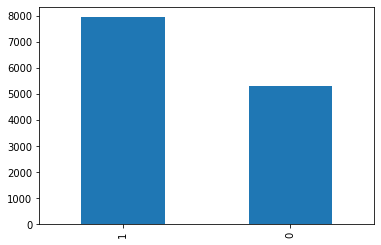

In [75]:
df['category'].value_counts().plot.bar()

Sample image

Shuffle df

In [76]:
# shuffle the DataFrame rows 
df = df.sample(frac = 1).reset_index(drop=True) 

In [77]:
df.head()

,filename,category
0,nonrumor_images/61e04755jw1ezv9w7jed8j20f4088g...,0
1,nonrumor_images/593bbc68gw1ezb2ubhrdij20jg0jga...,0
2,nonrumor_images/684ebae3jw1eybab5qn57j208l0faa...,0
3,rumor_images/61ff32dejw1eo2ejgn6evj209r06ymxo.jpg,1
4,rumor_images/949eeb5ejw1elmjjl7jyhj20p018gdr8.jpg,1


In [78]:
df.tail()

,filename,category
13267,nonrumor_images/6a5ce645jw1ezs3xuibouj20c80837...,0
13268,nonrumor_images/644471aegw1ey59ar9eifj20go0c6q...,0
13269,nonrumor_images/4ee36f05gw1ey05n40d9xj20c806vt...,0
13270,nonrumor_images/684ebae3jw1ey8puhfssmj20c80vq4...,0
13271,rumor_images/005FcijYjw1ev1evrkwsij30f00qo0v0.jpg,1


Make a combined list with rumor and non rumor image paths last part

In [79]:
filenames = []
categories = []
for i in range(0, len(df)):
  filenames.append(str(df['filename'][i]))
  categories.append((df['category'][i]))
print(len(filenames))
print(len(categories))

13272
13272


In [80]:
print(filenames[0])
print(categories[0])
print(filenames[-1])
print(categories[-1])

nonrumor_images/61e04755jw1ezv9w7jed8j20f4088gmw.jpg
0
rumor_images/005FcijYjw1ev1evrkwsij30f00qo0v0.jpg
1


nonrumor_images/593793e5gw1eyt3414dwrj20c80960t3.jpg


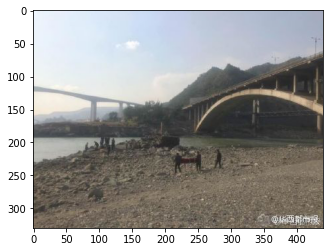

In [81]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

nonrumor_images/488d2478jw1ew332yb96bj20hs0dggn8.jpg


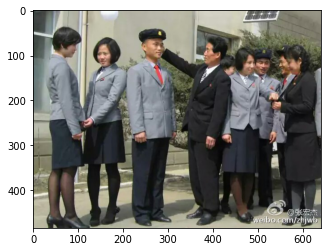

In [82]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

rumor_images/742c97d9tw1ebeoto313oj20m80gnq5o.jpg


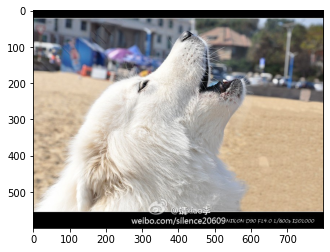

In [83]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

rumor_images/69045ba4gw1dubwbp6lhbj.jpg


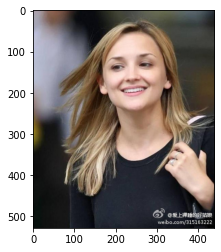

In [84]:
sample = random.choice(filenames)
print(sample)
image = load_img("./train_extracted/MM17-WeiboRumorSet/"+sample)
plt.imshow(image)

##Build Model

In [85]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, Input

# Simply importing existing models from keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19  import VGG19
from keras.applications.inception_v3  import InceptionV3

# FF + LR

# VGG-16
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
vgg16_base.trainable = False # freeze the base model
vgg16 = Sequential([
    vgg16_base,
    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(2, activation='softmax')
])
vgg16.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
vgg16.summary()

# VGG-19
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
vgg19_base.trainable = False # freeze the base model
vgg19 = Sequential([
    vgg19_base,
    Flatten(),
    Dense(4096, activation="relu"),
    Dense(4096, activation="relu"),
    Dense(2, activation='softmax')
])
vgg19.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
vgg19.summary()

# Inception V3
iv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
iv3_base.trainable = False # freeze the base model

inception_v3 = Sequential([
    iv3_base,
    Flatten(),
    Dense(4096, activation='softmax'),
    Dense(2, activation='softmax')
])
inception_v3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
inception_v3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dense_9 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 8194      
Total params: 65,062,722
Trainable params: 50,348,034
Non-trainable params: 14,714,688
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type

Callbacks

In [86]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Early Stop

To prevent over fitting we will stop the learning after 3 epochs and val_loss value not decreased

In [87]:
earlystop = EarlyStopping(patience=5)

Learning Rate Reduction

We will reduce the learning rate when then accuracy not increase for 2 steps

In [88]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

In [89]:
callbacks = [earlystop, learning_rate_reduction]

Prepare data

Because we will use image genaretor with class_mode="categorical". We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification.

So we will convert 1 to rumor and 0 to nonrumor

In [90]:
df["category"] = df["category"].replace({0: 'nonrumor', 1: 'rumor'}) 

In [91]:
df.head()

,filename,category
0,nonrumor_images/61e04755jw1ezv9w7jed8j20f4088g...,nonrumor
1,nonrumor_images/593bbc68gw1ezb2ubhrdij20jg0jga...,nonrumor
2,nonrumor_images/684ebae3jw1eybab5qn57j208l0faa...,nonrumor
3,rumor_images/61ff32dejw1eo2ejgn6evj209r06ymxo.jpg,rumor
4,rumor_images/949eeb5ejw1elmjjl7jyhj20p018gdr8.jpg,rumor


Divide into 50% train and 50% test, Note that we have shuffled earlier

In [92]:
mid = int(len(df)/2)
df_train = df[:mid]
df_test = df[mid:]
print(len(df_train))
print(len(df_test))

6636
6636


In [93]:
train_df, validate_df = train_test_split(df_train, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

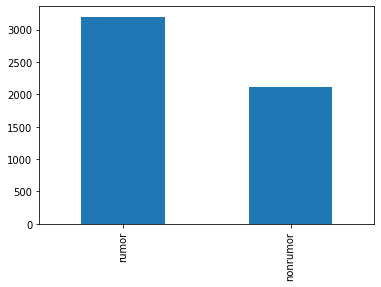

In [94]:
train_df['category'].value_counts().plot.bar()

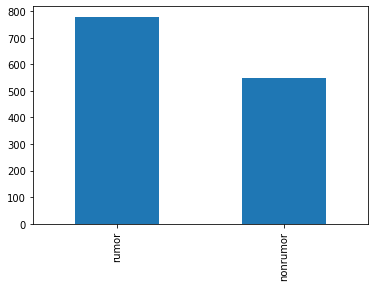

In [95]:
validate_df['category'].value_counts().plot.bar()

In [96]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

Traning Generator

In [97]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5297 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 11 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Validation Generator

In [98]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1326 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 2 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


See how our training generator work (now without pre-processing)

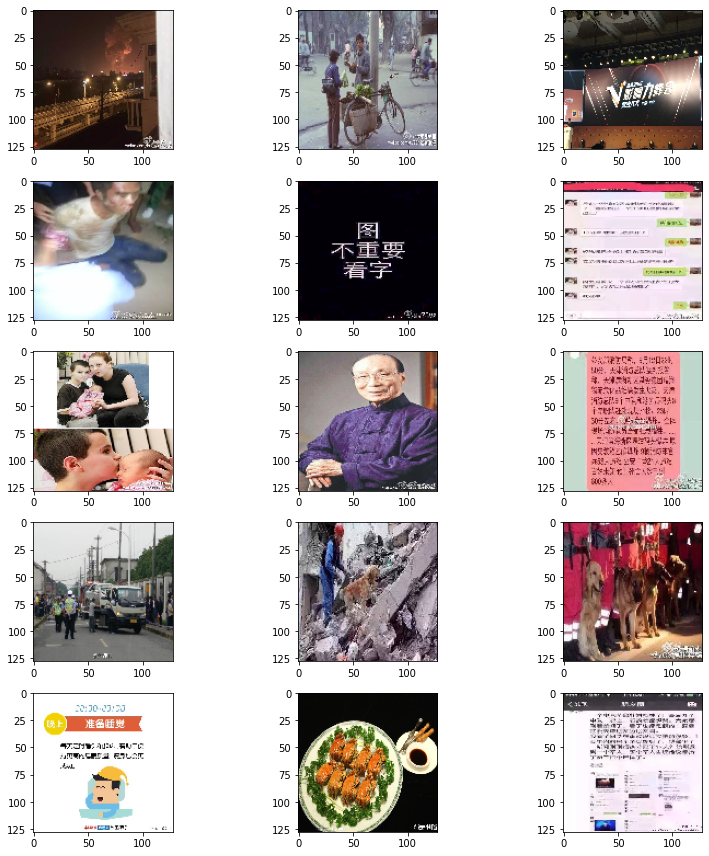

In [99]:
plt.figure(figsize=(12, 12))
i = 0
for X_batch, Y_batch in train_generator:
    plt.subplot(5, 3, i+1)
    image = X_batch[0]
    plt.imshow(image)
    i += 1
    if i >= 15: break
plt.tight_layout()
plt.show()

Fit Model

In [100]:
FAST_RUN = False

In [101]:
epochs=3 if FAST_RUN else 15 # since the model is pretrained, 15 epochs are enough

In [102]:
history_vgg16 = vgg16.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/15
353/353 [==============================] - 51s 143ms/step - loss: 2.1497 - accuracy: 0.5971 - val_loss: 0.7030 - val_accuracy: 0.6386
Epoch 2/15
353/353 [==============================] - 50s 143ms/step - loss: 0.6087 - accuracy: 0.6757 - val_loss: 0.5895 - val_accuracy: 0.6462
Epoch 3/15
353/353 [==============================] - 51s 144ms/step - loss: 0.5560 - accuracy: 0.7226 - val_loss: 0.6532 - val_accuracy: 0.7121
Epoch 4/15
353/353 [==============================] - 51s 146ms/step - loss: 0.4962 - accuracy: 0.7630 - val_loss: 0.6085 - val_accuracy: 0.7356
Epoch 5/15
353/353 [==============================] - 51s 146ms/step - loss: 0.4531 - accuracy: 0.7917 - val_loss: 0.7061 - val_accuracy: 0.6720
Epoch 6/15
353/353 [==============================] - ETA: 0s - loss: 0.3948 - accuracy: 0.8357
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
353/353 [==============================] - 51s 145ms/step - loss: 0.3948 - accuracy: 0.8357 - val_l

In [103]:
history_vgg19 = vgg19.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/15
353/353 [==============================] - 52s 147ms/step - loss: 1.9690 - accuracy: 0.5808 - val_loss: 0.6145 - val_accuracy: 0.6394
Epoch 2/15
353/353 [==============================] - 51s 146ms/step - loss: 0.6160 - accuracy: 0.6592 - val_loss: 0.5809 - val_accuracy: 0.7023
Epoch 3/15
353/353 [==============================] - 51s 145ms/step - loss: 0.5753 - accuracy: 0.7033 - val_loss: 0.6286 - val_accuracy: 0.6659
Epoch 4/15
353/353 [==============================] - 52s 146ms/step - loss: 0.5225 - accuracy: 0.7367 - val_loss: 0.6707 - val_accuracy: 0.7273
Epoch 5/15
353/353 [==============================] - 52s 148ms/step - loss: 0.4948 - accuracy: 0.7683 - val_loss: 0.6882 - val_accuracy: 0.6939
Epoch 6/15
353/353 [==============================] - ETA: 0s - loss: 0.4531 - accuracy: 0.7914
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
353/353 [==============================] - 52s 147ms/step - loss: 0.4531 - accuracy: 0.7914 - val_l

In [104]:
history_iv3 = inception_v3.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/15
353/353 [==============================] - 53s 149ms/step - loss: 0.6779 - accuracy: 0.5922 - val_loss: 0.6785 - val_accuracy: 0.5864
Epoch 2/15
353/353 [==============================] - 51s 145ms/step - loss: 0.6748 - accuracy: 0.6017 - val_loss: 0.6796 - val_accuracy: 0.5871
Epoch 3/15
353/353 [==============================] - 51s 146ms/step - loss: 0.6740 - accuracy: 0.6022 - val_loss: 0.6742 - val_accuracy: 0.5864
Epoch 4/15
353/353 [==============================] - ETA: 0s - loss: 0.6677 - accuracy: 0.6019
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
353/353 [==============================] - 51s 144ms/step - loss: 0.6677 - accuracy: 0.6019 - val_loss: 0.6639 - val_accuracy: 0.5856
Epoch 5/15
353/353 [==============================] - 51s 145ms/step - loss: 0.6556 - accuracy: 0.6022 - val_loss: 0.6544 - val_accuracy: 0.5864
Epoch 6/15
353/353 [==============================] - 52s 147ms/step - loss: 0.6476 - accuracy: 0.6020 - val_l

Save Model

In [105]:
vgg16.save_weights("vgg16.h5")
vgg19.save_weights("vgg19.h5")
inception_v3.save_weights("inception_v3.h5")

Visualize Training

VGG-16


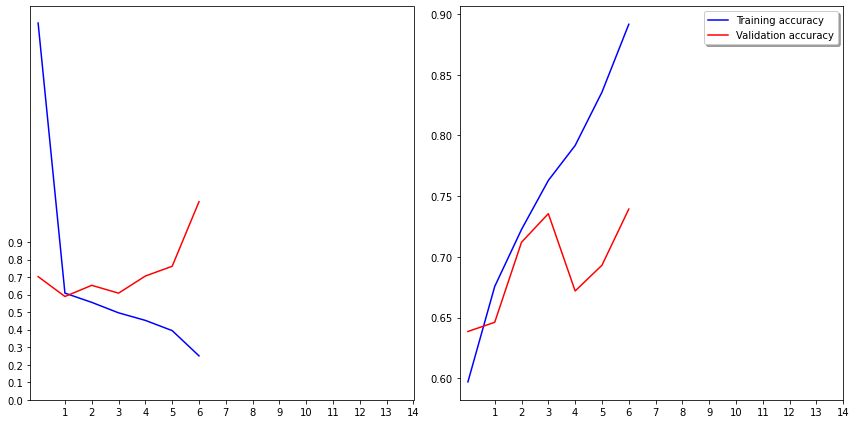

VGG-19


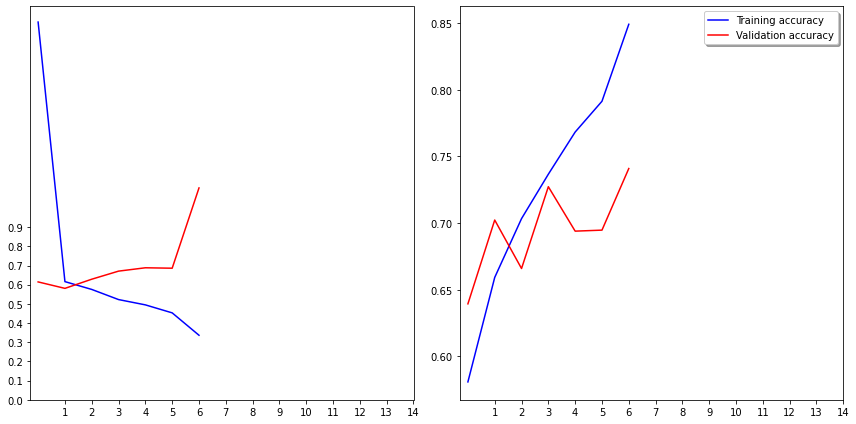

Inception V3


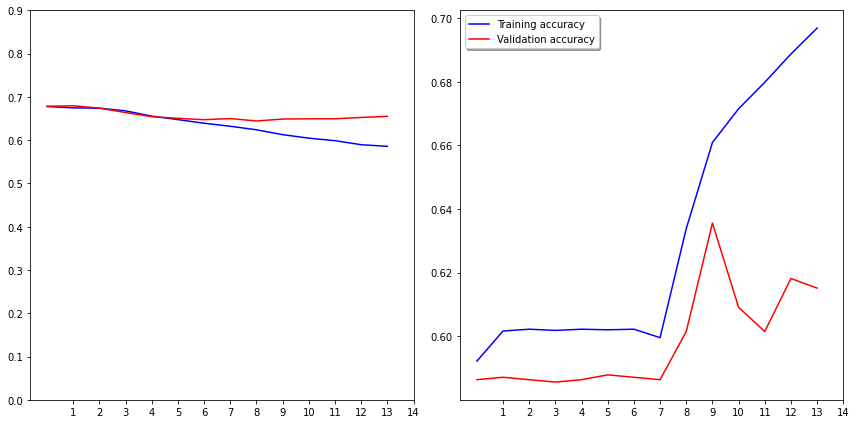

In [106]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epochs, 1))
    ax1.set_yticks(np.arange(0, 1, 0.1))

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xticks(np.arange(1, epochs, 1))

    legend = plt.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

print("VGG-16")
plot_history(history_vgg16)
print("VGG-19")
plot_history(history_vgg19)
print("Inception V3")
plot_history(history_iv3)

Prepare Testing Data

In [107]:
df_test.head()

,filename,category
6636,rumor_images/9e5389bbtw1egxqzuubwzj20mr0e00tj.jpg,rumor
6637,rumor_images/0062c75Ejw1ev5se1ue9lj30hr0tladw.jpg,rumor
6638,nonrumor_images/70e11e0fjw1eujqv2t9gwj20h70cet...,nonrumor
6639,rumor_images/4ee36f05gw1el9c1xzg7rj20fa0aywf6.jpg,rumor
6640,nonrumor_images/620beb06gw1ezgk8ilqmwj20c80dyd...,nonrumor


In [108]:
df_test = df_test.reset_index(drop = True)

In [109]:
test_filenames = []
test_categories = []
for i in range(0,len(df_test)):
  test_filenames.append(df_test['filename'][i])
  test_categories.append(df_test['category'][i])
print(len(test_filenames))

6636


In [110]:
test_df = df_test
nb_samples = test_df.shape[0]

Create Testing Generator

In [111]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "./train_extracted/MM17-WeiboRumorSet/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False,
    validate_filenames=False
)

Found 6636 non-validated image filenames.


Predict

In [112]:
predict_vgg16 = vgg16.predict(test_generator, steps=np.ceil(nb_samples/batch_size))
predict_vgg19 = vgg19.predict(test_generator, steps=np.ceil(nb_samples/batch_size))
predict_iv3 = inception_v3.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [113]:
y_vgg16 = np.argmax(predict_vgg16, axis=-1)
y_vgg19 = np.argmax(predict_vgg19, axis=-1)
y_iv3 = np.argmax(predict_iv3, axis=-1)

y_true = test_df["category"].replace({'nonrumor': 0, 'rumor': 1}) 

In [115]:
test_df["vgg16"] = np.argmax(predict_vgg16, axis=-1)
test_df["vgg19"] = np.argmax(predict_vgg19, axis=-1)
test_df["iv3"] = np.argmax(predict_iv3, axis=-1)

In [114]:
from sklearn.metrics import accuracy_score # normal accuracy
from sklearn.metrics import balanced_accuracy_score # used in case of imbalanced data sets, average of recall, from 0 to 1
from sklearn.metrics import confusion_matrix # division of performance on the multilabels
from sklearn.metrics import cohen_kappa_score # compares model against random prediction, from -1 to 1
from sklearn.metrics import classification_report # for multilabel classification, gives precision, recall, f score, support, more
target_names = ['class 0', 'class 1']

def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Balanced Accuracy:" , balanced_accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Cohen Kappa Score:", cohen_kappa_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=target_names))
    
print('VGG-16')
print_metrics(y_true, y_vgg16)
print('VGG-19')
print_metrics(y_true, y_vgg19)
print('Inception_V3')
print_metrics(y_true, y_iv3)

VGG-16
Accuracy: 0.7276974080771549
Balanced Accuracy: 0.7140075017903611
Confusion Matrix:
 [[1716  945]
 [ 862 3113]]
Cohen Kappa Score: 0.43023302224168447
Classification Report:
               precision    recall  f1-score   support

     class 0       0.67      0.64      0.66      2661
     class 1       0.77      0.78      0.78      3975

    accuracy                           0.73      6636
   macro avg       0.72      0.71      0.72      6636
weighted avg       0.73      0.73      0.73      6636

VGG-19
Accuracy: 0.7233273056057866
Balanced Accuracy: 0.6911046350854055
Confusion Matrix:
 [[1406 1255]
 [ 581 3394]]
Cohen Kappa Score: 0.39890930694546445
Classification Report:
               precision    recall  f1-score   support

     class 0       0.71      0.53      0.60      2661
     class 1       0.73      0.85      0.79      3975

    accuracy                           0.72      6636
   macro avg       0.72      0.69      0.70      6636
weighted avg       0.72      0.72  

In [117]:
# saving the dataframe of our results
from google.colab import files
test_df.to_csv('test_df_5331.csv') 
files.download('test_df_5331.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>